<a href="https://colab.research.google.com/github/FZsara/image_processing/blob/main/ip_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

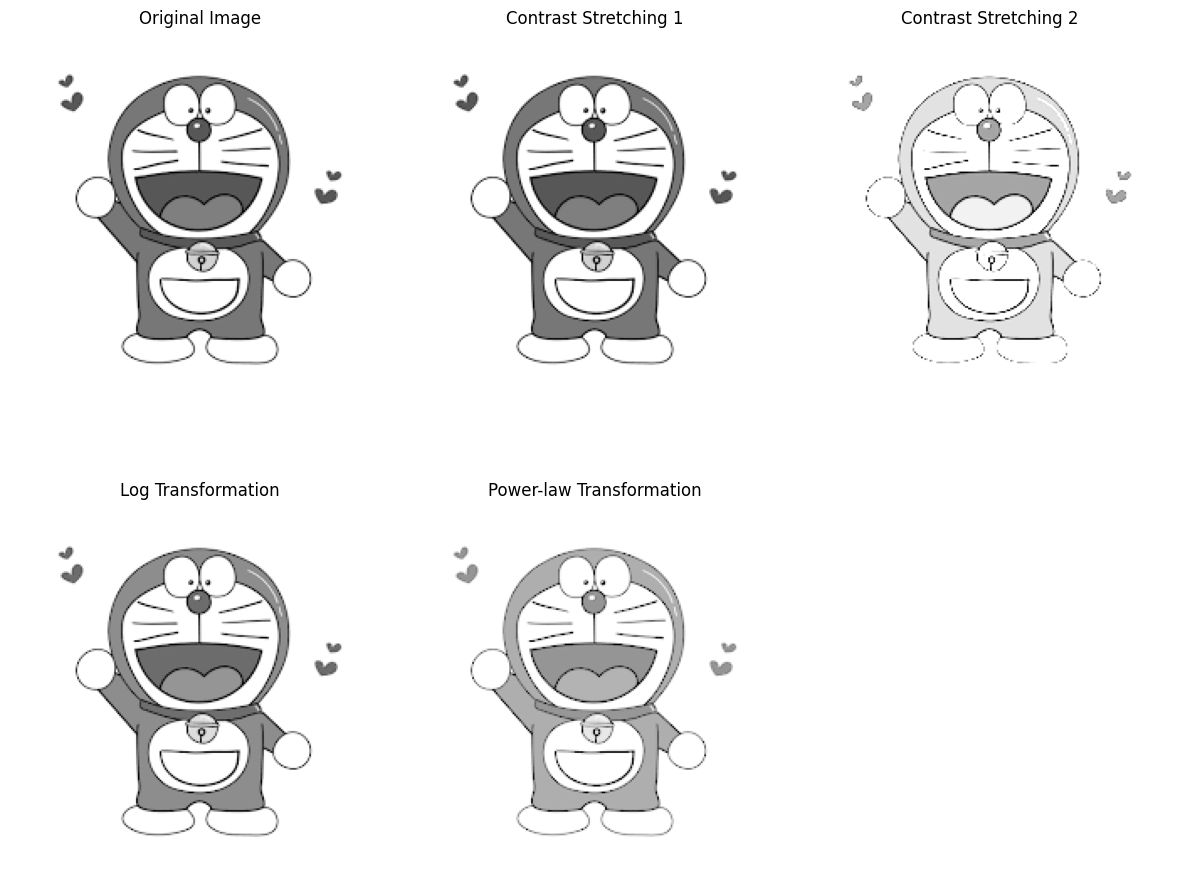

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/content/drive/MyDrive/dorae.png', 0)  # Load as grayscale

# Check if the image was loaded properly
if image is None:
    raise ValueError("Image not found. Please make sure the file 'image.jpg' is in the correct directory.")

# Convert the image to float and normalize to range [0, 1]
image = np.float32(image) / 255.0

# Contrast Stretching Method 1: Min-Max Normalization
min_val = np.min(image)
max_val = np.max(image)
stretched_img_1 = (image - min_val) / (max_val - min_val)

# Contrast Stretching Method 2: Linear Scaling
scaling_factor = 1.9  # Example scaling factor
stretched_img_2 = image * scaling_factor  # increase contrasrt
stretched_img_2 = np.clip(stretched_img_2, 0, 1)  # Clip values to the range [0, 1]

# Log Transformation
c = 1 / np.log(1 + np.max(image))
log_img = c * np.log(1 + image) # to enhance details in the darker regions of the image.

# Power-law (Gamma) Transformation
gamma = 0.5  # Example gamma value  #less than bright
power_img = np.power(image, gamma)

# Display the images
titles = [
    'Original Image',
    'Contrast Stretching 1',
    'Contrast Stretching 2',
    'Log Transformation',
    'Power-law Transformation'
]
images = [image, stretched_img_1, stretched_img_2, log_img, power_img]

plt.figure(figsize=(12, 10))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()